In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

22/02/14
Which TF has the most isoforms overall?

In [18]:
df = pd.read_csv('human_talon_abundance_filtered.tsv', sep='\t')
df = get_isos_per_gene(df,
                       min_tpm=1,
                       gene_subset='tf',
                       groupby='all', 
                       nov=['Known', 'NIC', 'NNC'])
gene_df, _, _ = get_gtf_info(how='gene')
df = df.merge(gene_df[['gid', 'gname']], 
              how='left', 
              left_index=True, 
              right_on='gid')
df.sort_values(by='all', ascending=False)

Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for tf genes
Enforcing minimum TPM
Total # isos detected: 156027
# isos >= 1 tpm: 141390
Applying gene type and novelty subset
Number of isos reported: 5201


,all,gid,gname
296,27,ENSG00000074800.15,ENO1
28813,25,ENSG00000095794.19,CREM
50804,24,ENSG00000181666.17,HKR1
16169,23,ENSG00000081189.15,MEF2C
48103,21,ENSG00000177426.20,TGIF1
...,...,...,...
56770,1,ENSG00000184481.16,FOXO4
39081,1,ENSG00000184302.6,SIX6
54589,1,ENSG00000184058.14,TBX1
11374,1,ENSG00000183770.6,FOXL2


Which TF has the most isoforms in a sample?

In [17]:
df = pd.read_csv('human_talon_abundance_filtered.tsv', sep='\t')
df = get_isos_per_gene(df,
                       min_tpm=1,
                       gene_subset='tf',
                       groupby='sample', 
                       nov=['Known', 'NIC', 'NNC'])
df['max_sample'] = df.max(1)
df = df['max_sample'].to_frame()

gene_df, _, _ = get_gtf_info(how='gene')
df = df.merge(gene_df[['gid', 'gname']], 
              how='left', 
              left_index=True, 
              right_on='gid')

df.sort_values(by='max_sample', ascending=False)

Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for tf genes
Enforcing minimum TPM
Total # isos detected: 156027
# isos >= 1 tpm: 141390
Applying gene type and novelty subset
Number of isos reported: 5201
Found 31 total samples


,max_sample,gid,gname
296,25.0,ENSG00000074800.15,ENO1
28813,21.0,ENSG00000095794.19,CREM
50804,20.0,ENSG00000181666.17,HKR1
15672,18.0,ENSG00000062194.15,GPBP1
50642,17.0,ENSG00000089335.20,ZNF302
...,...,...,...
9902,1.0,ENSG00000114853.13,ZBTB47
6924,1.0,ENSG00000115041.12,KCNIP3
19961,1.0,ENSG00000135547.8,HEY2
6557,1.0,ENSG00000115297.10,TLX2


,adipose,adrenal gland,colon,gm12878,h9,h9_chondro,h9_de,h9_neural_crest,h9_osteocyte,h9_panc_beta,...,muscle,ovary,panc1,pc3,pgp1,pgp1_astro,pgp1_endo,pgp1_excite_neuron,vessels,max_sample
annot_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000001167.14,2.0,3.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,...,2.0,2.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0
ENSG00000004848.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
ENSG00000005073.5,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
ENSG00000005102.12,2.0,NaN,2.0,3.0,NaN,NaN,NaN,1.0,NaN,1.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
ENSG00000005513.9,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0


In [2]:
df = get_n_gencode_isos(subset='polya')

In [3]:
df.head()

,gid,gname,n_isos_gencode
0,ENSG00000109339.21,MAPK10,192
1,ENSG00000179818.13,PCBP1-AS1,170
2,ENSG00000242086.8,MUC20-OT1,142
3,ENSG00000285219.1,AL591485.1,113
4,ENSG00000227036.7,LINC00511,106


## TODO make this look nice

Which gene has the most known isoforms in gencode and how many?

In [52]:
df, _, _ = get_gtf_info(how='iso', subset='polya')

In [53]:
df.head()

,tid,t_len,gid,gname,biotype,biotype_category,tf
0,ENST00000000233.9,1103,ENSG00000004059.10,ARF5,protein_coding,protein_coding,False
1,ENST00000000412.7,2756,ENSG00000003056.7,M6PR,protein_coding,protein_coding,False
2,ENST00000000442.10,2215,ENSG00000173153.13,ESRRA,protein_coding,protein_coding,True
3,ENST00000001008.5,3732,ENSG00000004478.7,FKBP4,protein_coding,protein_coding,False
4,ENST00000001146.6,4732,ENSG00000003137.8,CYP26B1,protein_coding,protein_coding,False


In [54]:
df = df[['gid', 'tid']]
df = df.groupby('gid').count().reset_index()
df.rename({'tid': 'n_isos_gencode'}, axis=1, inplace=True)
df.sort_values(by='n_isos_gencode', ascending=False, inplace=True)
gene_df, _, _ = get_gtf_info(how='gene', subset='polya')
df = df.merge(gene_df, how='left', on='gid')
# df.head(10)

,gid,n_isos_gencode,gname,length,biotype,biotype_category,tf
0,ENSG00000109339.21,192,MAPK10,604618.0,protein_coding,protein_coding,False
1,ENSG00000179818.13,170,PCBP1-AS1,140957.0,processed_transcript,lncRNA,False
2,ENSG00000242086.8,142,MUC20-OT1,81902.0,lincRNA,lncRNA,False
3,ENSG00000285219.1,113,AL591485.1,858565.0,bidirectional_promoter_lncRNA,lncRNA,False
4,ENSG00000227036.7,106,LINC00511,350381.0,processed_transcript,lncRNA,False
5,ENSG00000226674.9,102,TEX41,595021.0,lincRNA,lncRNA,False
6,ENSG00000127990.17,99,SGCE,132368.0,protein_coding,protein_coding,False
7,ENSG00000197912.15,96,SPG7,67049.0,protein_coding,protein_coding,False
8,ENSG00000156113.22,93,KCNMA1,768768.0,protein_coding,protein_coding,False
9,ENSG00000196628.16,90,TCF4,442456.0,protein_coding,protein_coding,True


In [55]:
df.loc[df.gname == 'DES']

,gid,n_isos_gencode,gname,length,biotype,biotype_category,tf
14866,ENSG00000175084.11,4,DES,8362.0,protein_coding,protein_coding,False


Top gene is _MAPK10_ with 192 isoforms

In [35]:
total_isos = pd.read_csv('human_talon_abundance_filtered.tsv', sep='\t')
total_isos = get_isos_per_gene(total_isos,
                       min_tpm=1,
                       gene_subset='polya',
                       groupby='all', 
                       nov=['Known', 'NIC', 'NNC'])

Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 156027
# isos >= 1 tpm: 141390
Applying gene type and novelty subset
Number of isos reported: 92963


In [36]:
max_isos.reset_index(inplace=True)
max_isos.rename({'annot_gene_id': 'gid',
                 'count': 'n_isos_data'}, axis=1, inplace=True)

In [37]:
df = df.merge(max_isos, how='outer', on='gid')

In [38]:
df.head()

,gid,n_isos_gencode,index,n_isos_data
0,ENSG00000109339.21,192,3476.0,24.0
1,ENSG00000179818.13,170,13238.0,4.0
2,ENSG00000242086.8,142,19124.0,6.0
3,ENSG00000285219.1,113,23912.0,3.0
4,ENSG00000227036.7,106,17279.0,11.0


In [39]:
rm_1 = True
max_isos = 50

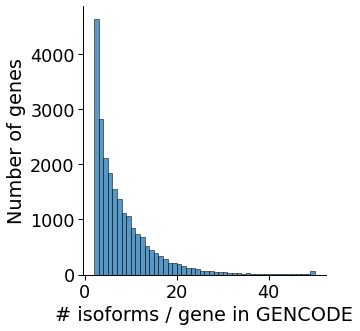

In [41]:
sns.set_context('paper', font_scale=2)

temp = df.copy(deep=True)

if rm_1:
    temp = temp.loc[temp.n_isos_gencode != 1]

if max_isos:
    temp.loc[temp.n_isos_gencode >= max_isos, 'n_isos_gencode'] = max_isos


ax = sns.displot(data=temp, x='n_isos_gencode', kind='hist', binwidth=1)
xlabel = '# isoforms / gene in GENCODE'
ylabel = 'Number of genes'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)

In [30]:
print(len(df.loc[df.n_isos_gencode > 15].index))

2319
